In [1]:
library("foreign")
rawdata=read.arff("./caesarian.csv.arff")
colnames(rawdata) = c("Age","DN","DT","BP","HP","CS")
str(rawdata)

'data.frame':	80 obs. of  6 variables:
 $ Age: Factor w/ 22 levels "17","18","19",..: 6 10 10 12 6 10 11 16 12 11 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 2 1 2 1 2 3 2 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 1 2 1 1 2 1 1 1 2 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 2 3 2 1 2 2 2 2 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ CS : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 1 2 ...


In [2]:
## check missing value
norg=length(rawdata[,1])
## remove rows containing missing values  
rawdata=na.omit(rawdata)
morg=length(rawdata[,1])
if( norg == morg ){ print("No rows containging missing value")}
if( norg != morg ){ print("Number of missing value="); print(norg-morg)}

[1] "No rows containging missing value"


In [3]:
## change data from wide type to long type 
library(reshape2)
rawdata.m = melt(rawdata[,-1], id.var="CS")
head(rawdata.m)
table(rawdata.m$variable)

Warning message:
“attributes are not identical across measure variables; they will be dropped”

CS,variable,value
0,DN,1
1,DN,2
0,DN,2
0,DN,1
1,DN,2
0,DN,1



DN DT BP HP 
80 80 80 80 

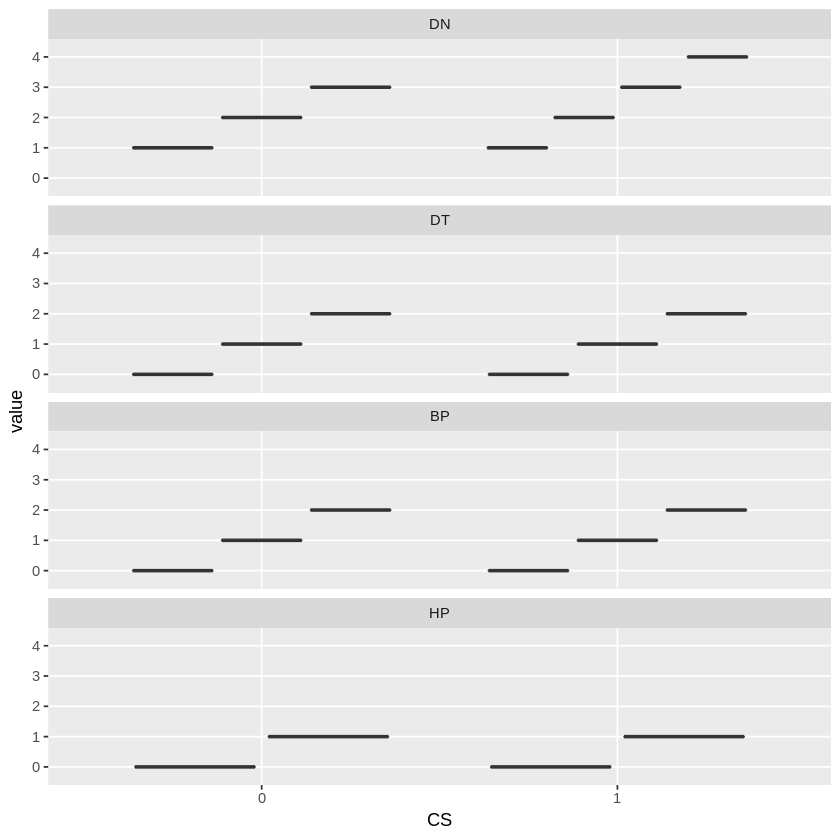

In [4]:
## boxplot
library(ggplot2)
ggplot(data=rawdata.m, aes(x=CS, y=value)) + geom_boxplot() + facet_wrap(~ variable, ncol=1)



In [5]:
head(rawdata)

Age,DN,DT,BP,HP,CS
22,1,0,2,0,0
26,2,0,1,0,1
26,2,1,1,0,0
28,1,0,2,0,0
22,2,0,1,0,1
26,1,1,0,0,0


In [6]:
## cross-tab
#install.packages("gmodels")
library(gmodels)
#cons = rawdata$CS %in% 1
CrossTable(x=rawdata$Age, y=rawdata$CS)
CrossTable(x=rawdata$DN, y=rawdata$CS)
CrossTable(x=rawdata$DT, y=rawdata$CS)
CrossTable(x=rawdata$BP, y=rawdata$CS)
CrossTable(x=rawdata$HP, y=rawdata$CS)



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  80 

 
             | rawdata$CS 
 rawdata$Age |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
          17 |         0 |         1 |         1 | 
             |     0.425 |     0.314 |           | 
             |     0.000 |     1.000 |     0.013 | 
             |     0.000 |     0.022 |           | 
             |     0.000 |     0.013 |           | 
-------------|-----------|-----------|-----------|
          18 |         1 |         1 |         2 | 
             |     0.026 |     0.020 |           | 
             |     0.500 |     0.500 |     0.025 | 
             |     0.029 |     0.022 |           | 
             |     0.013 |     0.013 |           | 
-------------|-----------|-----------|-----


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  80 

 
             | rawdata$CS 
  rawdata$DT |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        16 |        30 |        46 | 
             |     0.645 |     0.476 |           | 
             |     0.348 |     0.652 |     0.575 | 
             |     0.471 |     0.652 |           | 
             |     0.200 |     0.375 |           | 
-------------|-----------|-----------|-----------|
           1 |         9 |         8 |        17 | 
             |     0.436 |     0.322 |           | 
             |     0.529 |     0.471 |     0.212 | 
             |     0.265 |     0.174 |           | 
             |     0.113 |     0.100 |           | 
-------------|-----------|-----------|-----

In [7]:
a=CrossTable(x=rawdata$HP, y=rawdata$CS)
a
b=a$t
b
str(b)
b[,1]
c=as.data.frame(b)
c
c[,1]


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  80 

 
             | rawdata$CS 
  rawdata$HP |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        28 |        22 |        50 | 
             |     2.144 |     1.585 |           | 
             |     0.560 |     0.440 |     0.625 | 
             |     0.824 |     0.478 |           | 
             |     0.350 |     0.275 |           | 
-------------|-----------|-----------|-----------|
           1 |         6 |        24 |        30 | 
             |     3.574 |     2.641 |           | 
             |     0.200 |     0.800 |     0.375 | 
             |     0.176 |     0.522 |           | 
             |     0.075 |     0.300 |           | 
-------------|-----------|-----------|-----

$t
   y
x    0  1
  0 28 22
  1  6 24

$prop.row
   y
x      0    1
  0 0.56 0.44
  1 0.20 0.80

$prop.col
   y
x           0         1
  0 0.8235294 0.4782609
  1 0.1764706 0.5217391

$prop.tbl
   y
x       0     1
  0 0.350 0.275
  1 0.075 0.300


   y
x    0  1
  0 28 22
  1  6 24

 'table' int [1:2, 1:2] 28 6 22 24
 - attr(*, "dimnames")=List of 2
  ..$ x: chr [1:2] "0" "1"
  ..$ y: chr [1:2] "0" "1"


0  1 
28  6

x,y,Freq
0,0,28
1,0,6
0,1,22
1,1,24


[1] 0 1 0 1
Levels: 0 1

corrplot 0.84 loaded


'data.frame':	80 obs. of  6 variables:
 $ Age: Factor w/ 22 levels "17","18","19",..: 6 10 10 12 6 10 11 16 12 11 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 2 1 2 1 2 3 2 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 1 2 1 1 2 1 1 1 2 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 2 3 2 1 2 2 2 2 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ CS : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 1 2 ...
'data.frame':	80 obs. of  6 variables:
 $ Age: num  6 10 10 12 6 10 11 16 12 11 ...
 $ DN : num  1 2 2 1 2 1 2 3 2 1 ...
 $ DT : num  1 1 2 1 1 2 1 1 1 2 ...
 $ BP : num  3 2 2 3 2 1 2 2 2 2 ...
 $ HP : num  1 1 1 1 1 1 1 1 1 1 ...
 $ CS : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 1 2 ...


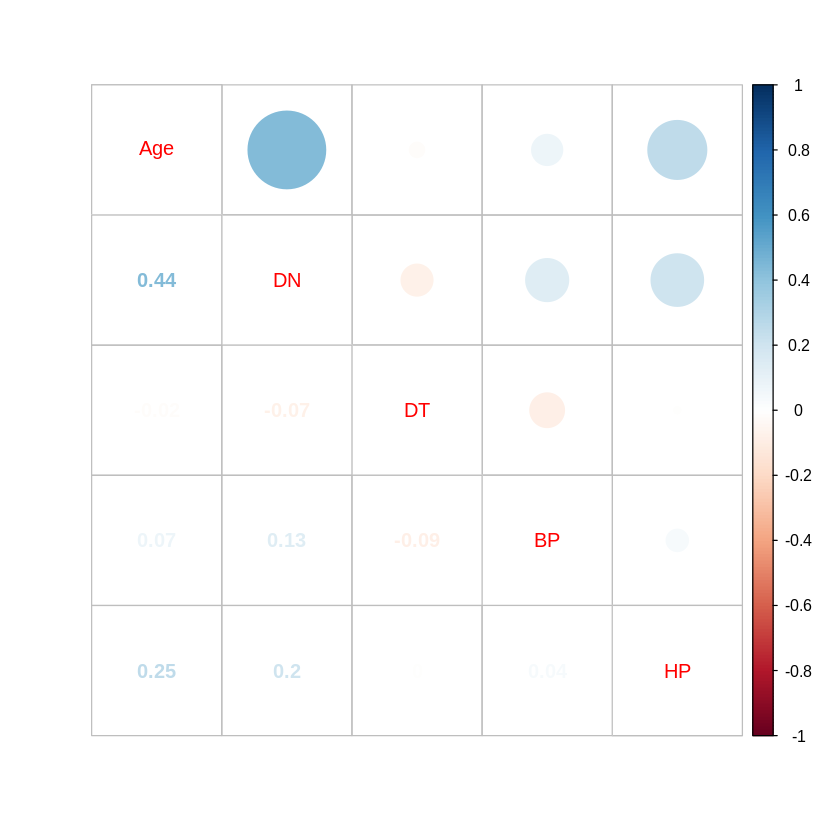

In [8]:
## check collinearity btw features
library(corrplot)
str(rawdata)
rawdata.num=rawdata
for ( i in 1:5)  { rawdata.num[,i] = as.numeric(rawdata[,i]) }
str(rawdata.num)

rawdata.cor = cor(rawdata.num[,1:5])
corrplot.mixed(rawdata.cor)

In [9]:
##sample from category data

## dividing orginal data by ratio for tran, test

#fix random seed
set.seed(123)

# make index vector(row number) for two type(x=2 : train, test) of samples 
# with probability weight : train:test = 7:3  
# in number of sample=nrow(rawdata3)=80 )
# replace : If TRUE, same data from orginal can be repeat in new sample
ind = sample(2, nrow(rawdata), replace=TRUE, prob=c(0.7,0.3))

traindata = rawdata[ind==1,] 
str(traindata) ## 80datas * 70% = 56datas
testdata = rawdata[ind==2,] 
str(testdata)



'data.frame':	56 obs. of  6 variables:
 $ Age: Factor w/ 22 levels "17","18","19",..: 6 10 10 11 12 11 17 7 4 13 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 1 2 2 1 1 1 1 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 2 2 1 1 2 2 2 1 3 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 1 2 2 2 1 2 2 1 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ CS : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
'data.frame':	24 obs. of  6 variables:
 $ Age: Factor w/ 22 levels "17","18","19",..: 10 12 6 16 19 9 8 10 11 2 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 2 1 2 3 1 1 1 1 1 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 3 3 2 1 1 ...
 $ BP : Factor w/ 3 levels "0","1","2": 2 3 2 2 2 1 1 2 1 2 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 2 1 ...
 $ CS : Factor w/ 2 levels "0","1": 2 1 2 2 1 1 2 1 2 1 ...


In [10]:
## logistic reg. for category data
full.fit = glm(CS~., family=binomial, data=traindata)
summary(full.fit)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = CS ~ ., family = binomial, data = traindata)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.59745  -0.63593   0.00008   0.52251   2.16410  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)    18.1152 10754.0134   0.002    0.999
Age19           2.5219 13170.9225   0.000    1.000
Age20         -18.5369 10754.0133  -0.002    0.999
Age21           1.2923 15208.4713   0.000    1.000
Age22         -19.2847 10754.0134  -0.002    0.999
Age23         -36.1258 15208.4712  -0.002    0.998
Age24         -36.6685 15208.4713  -0.002    0.998
Age25         -18.9575 10754.0134  -0.002    0.999
Age26         -18.5102 10754.0134  -0.002    0.999
Age27         -17.8462 10754.0134  -0.002    0.999
Age28         -15.3920 10754.0136  -0.001    0.999
Age29           1.1300 11788.4886   0.000    1.000
Age30         -17.9533 10754.0134  -0.002    0.999
Age31         -36.6389 13169.0009  -0.003    0.998
Age32         -15.5089 10754.0

In [11]:
confint(full.fit)
exp(coef(full.fit))

Waiting for profiling to be done...
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurre

“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fi

,2.5 %,97.5 %
(Intercept),-2.094650e+03,NA
Age19,-9.573072e+02,NA
Age20,NA,2149.076458
Age21,-1.050708e+03,7136.888690
Age22,NA,2133.847798
Age23,NA,3025.698526
Age24,NA,2154.609943
Age25,NA,2127.019756
Age26,NA,2093.017957
Age27,NA,2022.884439


(Intercept)        Age19        Age20        Age21        Age22        Age23 
7.367648e+07 1.245201e+01 8.903008e-09 3.641040e+00 4.214474e-09 2.045343e-16 
       Age24        Age25        Age26        Age27        Age28        Age29 
1.188743e-16 5.846289e-09 9.144135e-09 1.776215e-08 2.067043e-07 3.095686e+00 
       Age30        Age31        Age32        Age33        Age35        Age36 
1.595793e-08 1.224403e-16 1.838919e-07 4.910363e-08 4.199804e-08 1.285069e+00 
       Age37        Age38          DN2          DN3          DN4          DT1 
4.267328e+01 3.788939e+00 4.947831e-01 7.589602e-02 8.475942e+07 6.160303e-01 
         DT2          BP1          BP2          HP1 
2.142227e+00 3.426632e-01 1.801525e+00 3.844716e+00

In [12]:
library(car)
vif(full.fit)

Loading required package: carData


,GVIF,Df,GVIF^(1/(2*Df))
Age,19.514940,19,1.081327
DN,5.815875,3,1.341022
DT,2.678911,2,1.279351
BP,3.088776,2,1.325704
HP,1.989140,1,1.410369


In [13]:
## log reg from numeric data

traindata.num = rawdata.num[ind==1,] 
str(traindata.num) ## 80datas * 70% = 56datas
testdata.num = rawdata.num[ind==2,] 
str(testdata.num)



'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : num  1 2 1 2 2 1 1 1 1 1 ...
 $ DT : num  1 2 2 1 1 2 2 2 1 3 ...
 $ BP : num  3 2 1 2 2 2 1 2 2 1 ...
 $ HP : num  1 1 1 1 1 1 1 1 2 2 ...
 $ CS : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
'data.frame':	24 obs. of  6 variables:
 $ Age: num  10 12 6 16 19 9 8 10 11 2 ...
 $ DN : num  2 1 2 3 1 1 1 1 1 1 ...
 $ DT : num  1 1 1 1 1 3 3 2 1 1 ...
 $ BP : num  2 3 2 2 2 1 1 2 1 2 ...
 $ HP : num  1 1 1 1 1 1 2 1 2 1 ...
 $ CS : Factor w/ 2 levels "0","1": 2 1 2 2 1 1 2 1 2 1 ...


In [14]:
## logistic reg. for category data (numeric type)
full.fit_num = glm(CS~., family=binomial, data=traindata.num)
summary(full.fit_num)


Call:
glm(formula = CS ~ ., family = binomial, data = traindata.num)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9359  -1.0293   0.5149   0.8963   1.5201  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.78921    1.76248  -1.583  0.11353   
Age          0.05993    0.07465   0.803  0.42208   
DN          -0.13158    0.44714  -0.294  0.76856   
DT          -0.14475    0.38001  -0.381  0.70327   
BP           0.24278    0.45556   0.533  0.59409   
HP           1.79571    0.67783   2.649  0.00807 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.837  on 55  degrees of freedom
Residual deviance: 65.160  on 50  degrees of freedom
AIC: 77.16

Number of Fisher Scoring iterations: 4


In [15]:
confint(full.fit_num)
exp(coef(full.fit_num))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-6.52697337,0.4877489
Age,-0.08732483,0.2112889
DN,-1.03231225,0.7578197
DT,-0.90278716,0.6074640
BP,-0.65111496,1.1662917
HP,0.53867485,3.2457265


(Intercept)         Age          DN          DT          BP          HP 
  0.0614700   1.0617647   0.8767134   0.8652415   1.2747866   6.0237491

In [16]:
vif(full.fit)

,GVIF,Df,GVIF^(1/(2*Df))
Age,19.514940,19,1.081327
DN,5.815875,3,1.341022
DT,2.678911,2,1.279351
BP,3.088776,2,1.325704
HP,1.989140,1,1.410369


In [17]:
# log reg from only numeric about Age

#copy data for pre-processing 
rawdata.num_age=rawdata

#change type for numeric data column=Age,DN(Delivery Number)
rawdata.num_age$Age=as.numeric(rawdata$Age)
#rawdata2$DN=as.numeric(rawdata$DN)

traindata.num_age = rawdata.num_age[ind==1,] 
str(traindata.num_age) ## 80datas * 70% = 56datas
testdata.num_age = rawdata.num_age[ind==2,] 
str(testdata.num_age)



'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 1 2 2 1 1 1 1 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 2 2 1 1 2 2 2 1 3 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 1 2 2 2 1 2 2 1 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ CS : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
'data.frame':	24 obs. of  6 variables:
 $ Age: num  10 12 6 16 19 9 8 10 11 2 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 2 1 2 3 1 1 1 1 1 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 3 3 2 1 1 ...
 $ BP : Factor w/ 3 levels "0","1","2": 2 3 2 2 2 1 1 2 1 2 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 2 1 ...
 $ CS : Factor w/ 2 levels "0","1": 2 1 2 2 1 1 2 1 2 1 ...


In [18]:
## logistic reg. for category data (numeric type about age only)
full.fit_num_age = glm(CS~., family=binomial, data=traindata.num_age)
summary(full.fit_num_age)


Call:
glm(formula = CS ~ ., family = binomial, data = traindata.num_age)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7656  -0.8930   0.2696   0.7518   1.9929  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)    0.95446    1.44035   0.663   0.5075  
Age            0.03012    0.08426   0.357   0.7208  
DN2            0.04250    0.80266   0.053   0.9578  
DN3           -0.39535    1.33656  -0.296   0.7674  
DN4           16.89548 2150.24360   0.008   0.9937  
DT1           -1.12722    0.91685  -1.229   0.2189  
DT2           -0.96034    0.93098  -1.032   0.3023  
BP1           -1.99671    1.02044  -1.957   0.0504 .
BP2            0.18724    1.04530   0.179   0.8578  
HP1            1.73123    0.83863   2.064   0.0390 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.837  on 55  degrees of freedom
Residual deviance: 54.993  on 46  d

In [19]:
#confidence interval
confint(full.fit_num_age)
#odd's ratio
exp(coef(full.fit_num_age))

Waiting for profiling to be done...
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities nume

,2.5 %,97.5 %
(Intercept),-1.864947,3.8934781
Age,-0.138677,0.1990255
DN2,-1.536625,1.6710164
DN3,-3.011753,2.4101886
DN4,-312.833520,NA
DT1,-3.095064,0.5863972
DT2,-2.929587,0.8162830
BP1,-4.206230,-0.1195749
BP2,-1.908930,2.3035984
HP1,0.173105,3.5623229


(Intercept)          Age          DN2          DN3          DN4          DT1 
2.597279e+00 1.030578e+00 1.043420e+00 6.734451e-01 2.175774e+07 3.239329e-01 
         DT2          BP1          BP2          HP1 
3.827623e-01 1.357810e-01 1.205920e+00 5.647595e+00

In [20]:
# variance inflation factor
vif(full.fit_num_age)

,GVIF,Df,GVIF^(1/(2*Df))
Age,1.426585,1,1.194397
DN,1.997602,3,1.122238
DT,1.529604,2,1.112102
BP,1.671006,2,1.136958
HP,1.364476,1,1.168108


In [21]:
#prediction in the range 0~1 (rseponse)
traindata.num_age$prob = predict(full.fit_num_age, type="response")
traindata.num_age$prob[1:5]
contrasts(traindata$CS)

[1] 0.7895850 0.1387436 0.5320669 0.3388495 0.3456296

,1
0,0
1,1


In [22]:
#confusion matrix
traindata.num_age$predict = rep(0, length(traindata.num_age$prob)) # make empty vector as 0 (False)
traindata.num_age$predict[traindata.num_age$prob>0.5] = 1 #fill vector if true (prob>0.5)
confm=table(traindata.num_age$predict, traindata$CS)
confm

   
     0  1
  0 15  6
  1  8 27

In [23]:
#accuracy : (TN+TP)/(TN+FP+FN+TP)
mean(traindata.num_age$predict == traindata.num_age$CS )


[1] 0.75

In [24]:
str(confm)
TN=as.integer(confm[1,1])
FP=confm[0,1]
TP=confm[2,2]
FN=confm[1,0]
conf = as.data.frame(confm)
str(conf)
conf
#Precision
Precision = TP/(TP+FP)
Recall = TP/(FN+TP)
Accuracy = (TN+TP)/(TN+FP+FN+TP)
print(Precision)
print(Recall)
print(Accuracy)

 'table' int [1:2, 1:2] 15 8 6 27
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2] "0" "1"
  ..$ : chr [1:2] "0" "1"
'data.frame':	4 obs. of  3 variables:
 $ Var1: Factor w/ 2 levels "0","1": 1 2 1 2
 $ Var2: Factor w/ 2 levels "0","1": 1 1 2 2
 $ Freq: int  15 8 6 27


Var1,Var2,Freq
0,0,15
1,0,8
0,1,6
1,1,27


numeric(0)
numeric(0)
numeric(0)


In [25]:
library(gmodels)
confm=CrossTable(traindata.num_age$predict, traindata$CS)
#table(confm)
str(confm)
Precision=confm$prop.col[2,2]
Recall=confm$prop.row[2,2]
Accuracy = (confm$t[2,2]+confm$t[1,1])/sum(confm$t)
print(Precision)
print(Recall)
print(Accuracy)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  56 

 
                          | traindata$CS 
traindata.num_age$predict |         0 |         1 | Row Total | 
--------------------------|-----------|-----------|-----------|
                        0 |        15 |         6 |        21 | 
                          |     4.712 |     3.284 |           | 
                          |     0.714 |     0.286 |     0.375 | 
                          |     0.652 |     0.182 |           | 
                          |     0.268 |     0.107 |           | 
--------------------------|-----------|-----------|-----------|
                        1 |         8 |        27 |        35 | 
                          |     2.827 |     1.970 |           | 
                          |     0.229 |     0.771 |   

In [26]:
library(caret)
confm=confusionMatrix(as.factor(traindata.num_age$predict), as.factor(traindata$CS), positive="1")
# Sensitivity = Precision
# Pos Pred Value = Recall
# Accuracy
confm
str(confm)
Precision=confm$byClass["Sensitivity"]
Recall=confm$byClass["Pos Pred Value"]
Accuracy = confm$overall["Accuracy"]
print(Precision)
print(Recall)
print(Accuracy)

Loading required package: lattice


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 15  6
         1  8 27
                                          
               Accuracy : 0.75            
                 95% CI : (0.6163, 0.8561)
    No Information Rate : 0.5893          
    P-Value [Acc > NIR] : 0.009055        
                                          
                  Kappa : 0.4766          
 Mcnemar's Test P-Value : 0.789268        
                                          
            Sensitivity : 0.8182          
            Specificity : 0.6522          
         Pos Pred Value : 0.7714          
         Neg Pred Value : 0.7143          
             Prevalence : 0.5893          
         Detection Rate : 0.4821          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.7352          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 15 8 6 27
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.75 0.477 0.616 0.856 0.589 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.818 0.652 0.771 0.714 0.771 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.8181818 
Pos Pred Value 
     0.7714286 
Accuracy 
    0.75 


In [27]:
testdata.num_age$prob = predict(full.fit_num_age, newdata=testdata.num_age, type="response")
testdata.num_age$predict = rep(0, length(testdata.num_age$prob))
testdata.num_age$predict[testdata.num_age$prob>0.5] = 1
table(testdata.num_age$predict, testdata.num_age$CS)
mean(testdata.num_age$predict == testdata.num_age$CS)

   
    0 1
  0 5 4
  1 6 9

[1] 0.5833333

In [28]:
library(caret)
confm=confusionMatrix(as.factor(testdata.num_age$predict), as.factor(testdata$CS), positive="1")
# Sensitivity = Precision
# Pos Pred Value = Recall
# Accuracy
confm
str(confm)
Precision=confm$byClass["Sensitivity"]
Recall=confm$byClass["Pos Pred Value"]
Accuracy = confm$overall["Accuracy"]
print(Precision)
print(Recall)
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 5 4
         1 6 9
                                          
               Accuracy : 0.5833          
                 95% CI : (0.3664, 0.7789)
    No Information Rate : 0.5417          
    P-Value [Acc > NIR] : 0.4213          
                                          
                  Kappa : 0.1489          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.6923          
            Specificity : 0.4545          
         Pos Pred Value : 0.6000          
         Neg Pred Value : 0.5556          
             Prevalence : 0.5417          
         Detection Rate : 0.3750          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.5734          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 5 6 4 9
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.583 0.149 0.366 0.779 0.542 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.692 0.455 0.6 0.556 0.6 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.6923077 
Pos Pred Value 
           0.6 
 Accuracy 
0.5833333 


In [29]:
#best subset reg.
library(bestglm)
cvdata = traindata.num_age[,-7:-8]
orgcolname=colnames(rawdata)
orgcolname[6]="y"
orgcolname
colnames(cvdata)=orgcolname
head(cvdata)
#cvdata$y= as.numeric(traindata$CS)
str(cvdata)

Loading required package: leaps


[1] "Age" "DN"  "DT"  "BP"  "HP"  "y"

,Age,DN,DT,BP,HP,y
1,6,1,0,2,0,0
3,10,2,1,1,0,0
6,10,1,1,0,0,0
7,11,2,0,1,0,0
9,12,2,0,1,0,0
10,11,1,1,1,0,1


'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 1 2 2 1 1 1 1 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 2 2 1 1 2 2 2 1 3 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 1 2 2 2 1 2 2 1 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ y  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...


In [30]:
#k-fold cross validation
cvdata.bestset=bestglm(Xy=cvdata, IC="CV", CVArgs=list(Method="HTF", K+10, REP=1), family=binomial)
summary(cvdata.best)

ERROR: Error in bestglm(Xy = cvdata, IC = "CV", CVArgs = list(Method = "HTF", : Cross-validation not available when there are categorical variables with more than 2 levels!


In [ ]:
#BIC
cvdata.bestset=bestglm(Xy=cvdata, IC="BIC", family=binomial)
cvdata.bestset

In [ ]:
?rep

#attribute 'Age' { 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38 }
#attribute 'Delivery number' { 1,2,3,4 }
#attribute 'Delivery time' { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer}
#attribute 'Blood of Pressure' { 2,1,0 } -> {0 = low , 1 = normal , 2 = high }
#attribute 'Heart Problem' { 1,0 } -> {0 = apt, 1 = inept }
#attribute Caesarian { 0,1 } -> {0 = No, 1 = Yes }

In [ ]:
mkcat=function(x,val) {
    y=c()
    y.length=length(x)
    count=1
    for(i in x){
        #print(i)
        #print(count)
        if( i == val) { y[count] = 1}
        else{ y[count] = 0}
        count=count+1
    }
    return (y)
}

In [ ]:
#copy data for pre-processing 
rawdata2=rawdata

#change type for numeric data column=Age,DN(Delivery Number)
rawdata2$Age=as.numeric(rawdata$Age)
rawdata2$DN=as.numeric(rawdata$DN)

#add cols for cateogry data
# DT(delivery time) ->  DT0(timly=0), DT1(premature=1), 2(latecomer)
rawdata2$DT0=mkcat(rawdata$DT, 0)
rawdata2$DT1=mkcat(rawdata$DT, 1)
rawdata2$DT2=mkcat(rawdata$DT, 2)

#BP(Blood pressure) -> BP0(low=0), BP1(normal=1), 2(high)
rawdata2$BP0=mkcat(rawdata$BP, 0)
rawdata2$BP1=mkcat(rawdata$BP, 1)
rawdata2$BP2=mkcat(rawdata$BP, 2)

#HP(Heart Problem) -> HP0(apt=0), HP1(inept=1)
rawdata2$HP0=mkcat(rawdata$HP, 0)
rawdata2$HP1=mkcat(rawdata$HP, 1)

#remove old data column
str(rawdata2)
rawdata3=rawdata2[-3:-5]
str(rawdata3)

In [ ]:
## data

In [ ]:
## make samples from data
## dividing orginal data by ratio for tran, test

#fix random seed
set.seed(123)

# make index vector(row number) for two type(x=2 : train, test) of samples 
# with probability weight : train:test = 7:3  
# in number of sample=nrow(rawdata3)=80 )
# replace : If TRUE, same data from orginal can be repeat in new sample
ind = sample(2, nrow(rawdata3), replace=TRUE, prob=c(0.7,0.3))

traindata.raw3 = rawdata3[ind==1,] 
str(traindata.raw3) ## 80datas * 70% = 56datas
testdata.raw3 = rawdata3[ind==2,] 
str(testdata.raw3)


In [ ]:
## check the conservation of original data
## check number of case CS=0 or 1
table(rawdata3$CS)
table(traindata$CS)
table(testdata$CS)


In [ ]:
## change data from wide type to long type 
library(reshape2)
rawdata.m2 = melt(rawdata3[,-1], id.var="CS")
head(rawdata.m2)
table(rawdata.m2$variable)
## boxplot
library(ggplot2)
ggplot(data=rawdata.m2, aes(x=CS, y=value)) + geom_boxplot() + facet_wrap(~ variable, ncol=1)




In [ ]:
#best subset reg.
library(bestglm)
cvdata = traindata.raw3
orgcolname=colnames(rawdata3)
orgcolname[3]="y"
orgcolname
colnames(cvdata)=orgcolname
head(cvdata)
cvdata$y= as.factor(traindata.raw3$DT0)
#cvdata$y= as.numeric(traindata.raw3$CS)
str(cvdata)

In [ ]:
#k-fold cross validation for best subset log reg
cvdata.bestset=bestglm(Xy=cvdata, IC="CV", CVArgs=list(Method="HTF", K=3, REP=1), family=binomial)
summary(cvdata.best)

In [ ]:
#BIC
cvdata.bestset=bestglm(Xy=cvdata, IC="BIC", family=binomial)
cvdata.bestset

In [ ]:
#ROCs
cvdata.bestset=bestglm(Xy=cvdata, IC="ROCs", family=binomial)
cvdata.bestset

In [ ]:
#